In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#optional, only for classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
#load training data
training_data_obj = pd.read_csv('mnist_train.csv',header=None)
traindata = np.array(training_data_obj)


In [12]:
#input of training data
X_train=traindata[:,1:].T
#print(X_train,X_train.shape)
X_train=X_train/255    #regularization for efficiency


In [13]:
#output of training data
Y_train = traindata[:,0]
Y_train = Y_train.reshape(1,Y_train.shape[0])
m=Y_train.shape[1]  #number of train examples
#print(Y_train)

#one-hot encoding of output data
Y_prob=np.zeros((10,m))
for i in range(0,m):
    a=Y_train[0,i]
   # print(a)
    Y_prob[a,i] = 1
    #print(i)
ans_train_real=Y_train
#print(Y_prob)    
Y_train=Y_prob

In [14]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

Epoch 0 cost:  12.045025191255656 	 Accuracy : 0.10288333333333333
Epoch 10 cost:  3.694224016837479 	 Accuracy : 0.4488333333333334
Epoch 20 cost:  2.3290683627475555 	 Accuracy : 0.6011500000000002
Epoch 30 cost:  1.8309775340256507 	 Accuracy : 0.6708833333333335
Epoch 40 cost:  1.568956610165477 	 Accuracy : 0.7107000000000002
Epoch 50 cost:  1.4023444433855383 	 Accuracy : 0.7369333333333334
Epoch 60 cost:  1.2843687682336846 	 Accuracy : 0.7554166666666668
Epoch 70 cost:  1.1951715980285111 	 Accuracy : 0.7696333333333336
Epoch 80 cost:  1.1247394492128164 	 Accuracy : 0.7813333333333335
Epoch 90 cost:  1.0673141028636723 	 Accuracy : 0.790616666666667
Epoch 100 cost:  1.0193278760778608 	 Accuracy : 0.7980333333333336
Epoch 110 cost:  0.9784547463582969 	 Accuracy : 0.8048833333333335
Epoch 120 cost:  0.9430967432626477 	 Accuracy : 0.8107833333333336
Epoch 130 cost:  0.9121095234495827 	 Accuracy : 0.8155333333333337
Epoch 140 cost:  0.8846489809998518 	 Accuracy : 0.8198500000

Epoch 1210 cost:  0.4142616788002173 	 Accuracy : 0.8980166666666669
Epoch 1220 cost:  0.4132296019195628 	 Accuracy : 0.8981000000000002
Epoch 1230 cost:  0.4122095533395873 	 Accuracy : 0.8981833333333336
Epoch 1240 cost:  0.4112013024720832 	 Accuracy : 0.8984500000000002
Epoch 1250 cost:  0.4102046250640025 	 Accuracy : 0.8986000000000002
Epoch 1260 cost:  0.4092193029578293 	 Accuracy : 0.8988000000000002
Epoch 1270 cost:  0.4082451238633908 	 Accuracy : 0.8990166666666668
Epoch 1280 cost:  0.4072818811405293 	 Accuracy : 0.8991500000000002
Epoch 1290 cost:  0.4063293735920865 	 Accuracy : 0.8993500000000002
Epoch 1300 cost:  0.40538740526666595 	 Accuracy : 0.8995666666666668
Epoch 1310 cost:  0.4044557852706801 	 Accuracy : 0.8997166666666668
Epoch 1320 cost:  0.4035343275891899 	 Accuracy : 0.8999166666666668
Epoch 1330 cost:  0.4026228509150897 	 Accuracy : 0.8999833333333336
Epoch 1340 cost:  0.4017211784861922 	 Accuracy : 0.9000666666666669
Epoch 1350 cost:  0.4008291379298

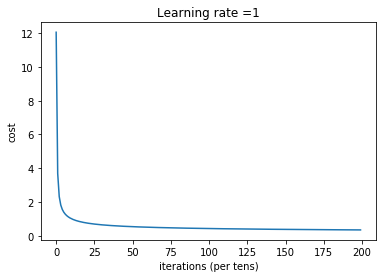

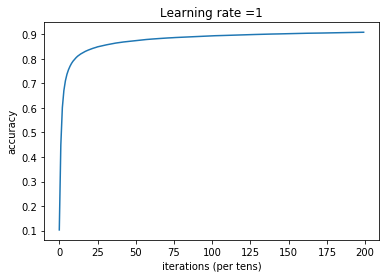

Final cost: 0.35774329341676997
Total Accuracy : 0.9083166666666669


In [15]:
n_x = X_train.shape[0] #input nodes = 28*28
n_h = 10               #output nodes= softmax results(one-hot encoding)
learning_rate = 1      #hyper_parameter: change it to get better results 
m=X_train.shape[1]

costs=[]               #list to store all the costs
accuracies=[]          #list to store all the accuracies

#initialize weights and biases
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))

X = X_train
Y = Y_train

for i in range(2000):  #number of iterations
    
    #calculating parameters
    Z1 = np.matmul(W1,X) + b1
    A1 = np.exp(Z1) / np.sum(np.exp(Z1), axis=0)
    
    #calculating cost
    cost = compute_multiclass_loss(Y, A1)
    
    #calculating derivatives
    dZ1 = A1-Y
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    #updating weights and biases
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 10 == 0):  #prints cost,accuracy every 10th iteration
        
        predictions = np.argmax(A1, axis=0)  #converting one-hot encoded results to single result
        labels = np.argmax(Y_train, axis=0)
        acc=np.sum((predictions == labels)/m)
        print("Epoch", i, "cost: ", cost,'\t Accuracy :',acc)
        costs.append(cost)
        accuracies.append(acc)

        
#plotting the cost and accuracy
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

plt.plot(np.squeeze(accuracies))
plt.ylabel('accuracy')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

print("Final cost:", cost)
print('Total Accuracy :',np.sum((predictions == labels)/m))


In [16]:
#Repeting the last iteration to see the final cost and accuracy
#using the latest(best) W1, b1 values

Z1 = np.matmul(W1, X_train) + b1
A1 = np.exp(Z1) / np.sum(np.exp(Z1), axis=0)

predictions = np.argmax(A1, axis=0)
labels = np.argmax(Y_train, axis=0)

#Analysis report of the trained model
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

print('Total Accuracy :',np.sum((predictions == labels)/m))

Total Accuracy : 0.9084833333333335


In [17]:
#loading test data
testing_data_obj = pd.read_csv('mnist_test.csv',header=None)
testdata = np.array(testing_data_obj)

#test data input features
X_test=testdata[:,1:].T
#print(X_test,X_test.shape)
X_test=X_test/255

#test data output values
Y_test = testdata[:,0]
Y_test = Y_test.reshape(1,Y_test.shape[0])
#print(Y_test,Y_test[0,0],Y_test.shape,testdata.shape)

#one-hot encoding output values
m=Y_test.shape[1]
Y_prob=np.zeros((10,m))
for i in range(0,m):
    a=Y_test[0,i]
   # print(a)
    Y_prob[a,i] = 1
    #print(i)
ans_test_real=Y_test
#print(Y_prob,Y_prob.shape)    
Y_test=Y_prob

In [18]:
#using the latest(best) W1, b1 values to calculate the output of the test cases

Z1 = np.matmul(W1, X_test) + b1
A1 = np.exp(Z1) / np.sum(np.exp(Z1), axis=0)

predictions = np.argmax(A1, axis=0)
labels = np.argmax(Y_test, axis=0)

#analysis report for test cases
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))
print('Total Accuracy :',np.sum((predictions == labels)/m))

Total Accuracy : 0.9052000000000002
